In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

pd.set_option("display.max_columns", None)

In [10]:
df = pd.read_csv('train.csv').drop('id', axis = 1)
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,25.017645,-4.061254,0.996632,-3.837345,-13.956994,-2.042957,2.130210,-1.957662,-1.149930,6.082028,0.878612,5.093102,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,2.952843,-5.046353,1.083819,3.978378,-25.072542,-2.041602,2.912269,-3.998035,6.069698,4.966187,1.994051,-1.132059,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,-23.218408,-9.000630,9.115957,12.097318,-10.954367,-3.930714,-19.069594,-6.118940,-5.001346,-9.105371,-9.894885,10.107614,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,-15.123774,-0.069867,-0.114247,-1.896109,5.127194,-2.877423,2.970044,-1.099702,3.116767,8.124209,-0.917418,-1.027199,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,16.010442,5.961219,9.907115,-0.067754,-9.970728,0.868499,1.892233,-3.161698,-9.225990,3.953956,-17.959652,-3.115491,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,38.935705,11.739764,12.078842,7.000148,62.908697,-24.981856,-2.804120,-5.847474,-78.034200,-6.052717,-8.027884,27.992994,41.046160,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2331,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,-1.970525,28.906574,-1.865353,5.974470,-1.957465,-11.014272,-2.107972,-1.883162,-4.918032,0.032044,-1.043068,-3.980494,30.933458,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2332,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,17.990090,3.966698,1.066745,3.988601,-40.966145,-1.997519,-5.877931,-5.022308,-25.948680,-15.880140,3.976966,10.996415,57.874418,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3
2333,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,-1.881519,-14.979219,-4.015727,-6.948209,-6.052921,65.066757,-8.885683,6.877978,8.861321,-15.161502,2.050648,-0.060606,-1.081436,-6.008398,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426,1


In [11]:
features = df.iloc[:, :32]
labels = df.iloc[:, 32]

features

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,25.017645,-4.061254,0.996632,-3.837345,-13.956994,-2.042957,2.130210,-1.957662,-1.149930,6.082028,0.878612,5.093102,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,2.952843,-5.046353,1.083819,3.978378,-25.072542,-2.041602,2.912269,-3.998035,6.069698,4.966187,1.994051,-1.132059,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,-23.218408,-9.000630,9.115957,12.097318,-10.954367,-3.930714,-19.069594,-6.118940,-5.001346,-9.105371,-9.894885,10.107614,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,-15.123774,-0.069867,-0.114247,-1.896109,5.127194,-2.877423,2.970044,-1.099702,3.116767,8.124209,-0.917418,-1.027199,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,16.010442,5.961219,9.907115,-0.067754,-9.970728,0.868499,1.892233,-3.161698,-9.225990,3.953956,-17.959652,-3.115491,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,38.935705,11.739764,12.078842,7.000148,62.908697,-24.981856,-2.804120,-5.847474,-78.034200,-6.052717,-8.027884,27.992994,41.046160,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265
2331,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,-1.970525,28.906574,-1.865353,5.974470,-1.957465,-11.014272,-2.107972,-1.883162,-4.918032,0.032044,-1.043068,-3.980494,30.933458,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670
2332,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,17.990090,3.966698,1.066745,3.988601,-40.966145,-1.997519,-5.877931,-5.022308,-25.948680,-15.880140,3.976966,10.996415,57.874418,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067
2333,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,-1.881519,-14.979219,-4.015727,-6.948209,-6.052921,65.066757,-8.885683,6.877978,8.861321,-15.161502,2.050648,-0.060606,-1.081436,-6.008398,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426


In [12]:
labels

0       1
1       1
2       0
3       1
4       2
       ..
2330    3
2331    3
2332    3
2333    1
2334    2
Name: target, Length: 2335, dtype: int64

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.36it/s]


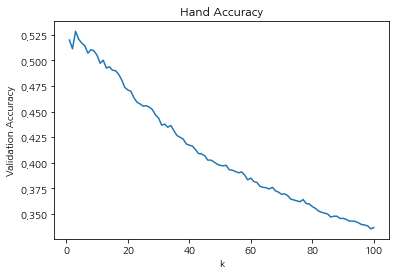

In [28]:
k_range = range(1, 101)
accuracies = []

for k in tqdm(k_range) :
    classifier = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(classifier, features, labels, cv = 5, scoring = "accuracy")
    accuracies.append(scores.mean())
    
plt.plot(k_range, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Hand Accuracy")
plt.show()

In [29]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

3
0.5284796573875803


In [51]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.2,
                                                    random_state = 908, stratify = labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

1868 467 1868 467


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.56it/s]


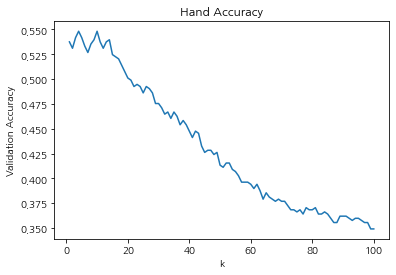

In [52]:
k_range = range(1, 101)
accuracies = []

for k in tqdm(k_range):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y.values.ravel())
    accuracies.append(classifier.score(test_x, test_y))
    
plt.plot(k_range, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Hand Accuracy")
plt.show()

In [53]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

4
0.5481798715203426


In [68]:
k = range(1, 501)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 908)
    scores = cross_val_score(rf, features, labels, cv = 5, scoring = "accuracy")
    accuracy = scores.mean()
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [1:29:12<00:00, 10.71s/it]

Best accuracy score: 0.781
Best number of trees : 300


<AxesSubplot:>

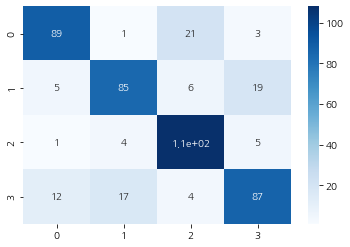

In [69]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 908)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Blues')

In [70]:
k = range(1, 501)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 908)
    rf.fit(train_x, train_y.values.ravel())

    predicted = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predicted)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [17:36<00:00,  2.11s/it]

Best accuracy score: 0.794
Best number of trees : 105


<AxesSubplot:>

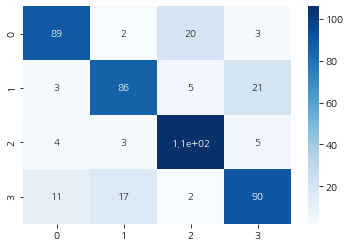

In [71]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 908)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Blues')

In [72]:
df_test = pd.read_csv('test.csv')
df_test

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,-8.048277,-23.975623,-2.938174,1.757796,3.982687,-18.094173,-0.055343,2.085911,1.885611,3.929806,7.987616,-1.047750,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,-3.046893,-11.052956,4.912758,16.986902,-11.192310,8.993925,-0.825023,3.969301,-19.889173,-17.971799,0.871808,-8.018209,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,-12.870060,12.018730,-1.972370,-4.989797,7.043337,-1.141632,6.174780,3.030673,-15.931609,9.983416,-3.251407,0.981729,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,-26.977501,-8.132294,-1.062246,-3.028002,27.782447,3.024800,-4.103924,-4.145369,-7.963091,-7.131190,1.070134,1.999624,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,-39.009595,26.919958,-8.052420,13.759281,-18.026002,1.073389,49.029965,-4.794785,37.975778,-1.941377,-21.816534,-7.096878,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,9339,7.963652,7.973099,12.877346,11.015341,-0.963491,-3.926525,-30.875620,6.022538,-1.934085,-2.019713,18.871473,-13.957552,-4.010725,-6.035864,-19.067238,-7.904299,-2.985582,-2.865601,-22.846460,12.993844,-2.084597,-3.056308,-6.913374,-28.872380,-0.822110,3.043326,11.113028,11.160472,2.034703,-0.056564,-3.959809,22.986533
9339,9340,-7.974772,0.997146,8.011316,-10.007376,1.065419,-15.090632,1.916883,-2.981494,2.948488,12.012327,5.108246,4.060304,2.957766,2.886642,-24.079141,-4.017220,2.159525,2.294092,-7.932833,7.090848,-4.055409,2.042084,0.972399,-4.158987,-4.971529,-9.957906,19.081232,-3.056299,-0.714567,-0.859710,7.950773,2.952029
9340,9341,4.035916,-10.138330,5.943174,8.080807,28.007780,4.981148,23.084630,-30.048268,9.877151,-2.048269,12.057614,28.965250,-28.882513,8.923127,15.983962,-14.007466,-0.879659,-0.053067,-4.005758,-6.065293,-6.823998,-11.014889,-11.013990,-26.176325,23.143486,4.913298,25.066640,4.044110,-1.948533,1.921691,13.952396,11.866490
9341,9342,8.920498,0.033165,20.058309,68.132886,4.037498,19.068331,-4.109146,-4.067740,-11.044263,1.134035,-14.997930,1.094676,1.056345,-7.112650,29.042684,3.040384,-14.068880,-13.890856,-16.047539,-24.053738,4.020378,10.100464,-7.072355,-18.864597,2.902505,-13.936057,3.058599,33.004942,2.932643,9.968502,-3.097104,7.966220


In [73]:
test_predict = rf.predict(df_test.iloc[:, 1:])
test_predict

array([0, 0, 1, ..., 2, 0, 3], dtype=int64)

In [74]:
df_test['target'] = test_predict
df_test

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,-8.048277,-23.975623,-2.938174,1.757796,3.982687,-18.094173,-0.055343,2.085911,1.885611,3.929806,7.987616,-1.047750,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771,0
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,-3.046893,-11.052956,4.912758,16.986902,-11.192310,8.993925,-0.825023,3.969301,-19.889173,-17.971799,0.871808,-8.018209,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175,0
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,-12.870060,12.018730,-1.972370,-4.989797,7.043337,-1.141632,6.174780,3.030673,-15.931609,9.983416,-3.251407,0.981729,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374,1
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,-26.977501,-8.132294,-1.062246,-3.028002,27.782447,3.024800,-4.103924,-4.145369,-7.963091,-7.131190,1.070134,1.999624,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603,3
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,-39.009595,26.919958,-8.052420,13.759281,-18.026002,1.073389,49.029965,-4.794785,37.975778,-1.941377,-21.816534,-7.096878,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,9339,7.963652,7.973099,12.877346,11.015341,-0.963491,-3.926525,-30.875620,6.022538,-1.934085,-2.019713,18.871473,-13.957552,-4.010725,-6.035864,-19.067238,-7.904299,-2.985582,-2.865601,-22.846460,12.993844,-2.084597,-3.056308,-6.913374,-28.872380,-0.822110,3.043326,11.113028,11.160472,2.034703,-0.056564,-3.959809,22.986533,3
9339,9340,-7.974772,0.997146,8.011316,-10.007376,1.065419,-15.090632,1.916883,-2.981494,2.948488,12.012327,5.108246,4.060304,2.957766,2.886642,-24.079141,-4.017220,2.159525,2.294092,-7.932833,7.090848,-4.055409,2.042084,0.972399,-4.158987,-4.971529,-9.957906,19.081232,-3.056299,-0.714567,-0.859710,7.950773,2.952029,1
9340,9341,4.035916,-10.138330,5.943174,8.080807,28.007780,4.981148,23.084630,-30.048268,9.877151,-2.048269,12.057614,28.965250,-28.882513,8.923127,15.983962,-14.007466,-0.879659,-0.053067,-4.005758,-6.065293,-6.823998,-11.014889,-11.013990,-26.176325,23.143486,4.913298,25.066640,4.044110,-1.948533,1.921691,13.952396,11.866490,2
9341,9342,8.920498,0.033165,20.058309,68.132886,4.037498,19.068331,-4.109146,-4.067740,-11.044263,1.134035,-14.997930,1.094676,1.056345,-7.112650,29.042684,3.040384,-14.068880,-13.890856,-16.047539,-24.053738,4.020378,10.100464,-7.072355,-18.864597,2.902505,-13.936057,3.058599,33.004942,2.932643,9.968502,-3.097104,7.966220,0


In [75]:
df_final = df_test[['id', 'target']]
df_final

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,1
9340,9341,2
9341,9342,0


In [76]:
df_final.to_csv('rf_105_submission.csv', index = False)